In [ ]:
! pip install ultralytics==8.0.38
import ultralytics
ultralytics.checks()
from ultralytics import YOLO
import torch
from pathlib import Path
from IPython.display import Image, clear_output
clear_output()

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

In [ ]:
#%cd {HOME}
#! yolo task=segment mode=predict model=yolov8n-seg.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=true
#clear_output()

In [ ]:
#%cd {HOME}
#Image(filename='runs/segment/predict/dog.jpeg')

In [5]:
! pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="K72bvIl0rTcvckcth1sm")

  Using cached opencv_python_headless-4.8.0.74-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (19 kB)
Reason for being yanked: deprecated, use 4.8.0.76
Using cached opencv_python_headless-4.8.0.74-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (49.1 MB)
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.10.0.82
    Uninstalling opencv-python-headless-4.10.0.82:
      Successfully uninstalled opencv-python-headless-4.10.0.82
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albucore 0.0.9 requires opencv-python-headless>=4.9.0.80, but you have opencv-python-headless 4.8.0.74 which is incompatible.
albumentations 1.4.8 requires opencv-python-headless>=4.9.0.80, but you have opencv-python-headless 4.8.0.74 which is incompatible.


In [6]:
'''
project = rf.workspace("insa-3ptmt").project("simplified")
version = project.version(2)
dataset = version.download("yolov8")
clear_output()
'''

'\nproject = rf.workspace("insa-3ptmt").project("simplified")\nversion = project.version(2)\ndataset = version.download("yolov8")\nclear_output()\n'

In [7]:
project = rf.workspace("insa-3ptmt").project("deep_forest")
version = project.version(1)
dataset = version.download("yolov8")
clear_output()

In [9]:
%cd {HOME}
model = YOLO("yolov8n-seg.pt")
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print("Device used ", device)

model.to(device)
results = model.train(
        task='segment',
        batch=8,
        data=dataset.location+"/data.yaml",
        epochs=50,
        imgsz=256,
    )

Ultralytics YOLOv8.0.38 🚀 Python-3.12.3 torch-2.3.1+cu121 CUDA:0 (Quadro P4000, 8106MiB)
yolo/engine/trainer: task=segment, mode=train, model=yolov8n-seg.yaml, data=/home/junior/Documents/stage-4a-SEDOGBO/model/model1/yolov8/deep_forest-1/data.yaml, epochs=50, patience=50, batch=8, imgsz=256, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, min_memory=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, split=val, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=F

/home/junior/Documents/stage-4a-SEDOGBO/model/model1/yolov8
Device used  cuda


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.Conv                  [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.Conv                  [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.C2f                   [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.Conv                  [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.C2f                   [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.Conv                  [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.C2f                   [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

In [10]:
#! yolo task=segment mode=train model=yolov8n-seg.pt  data={dataset.location}/data.yaml epochs=10 imgsz=640
#! ls {HOME}/runs/segment/train/

/home/junior/Documents/stage-4a-SEDOGBO/model/model1/yolov8


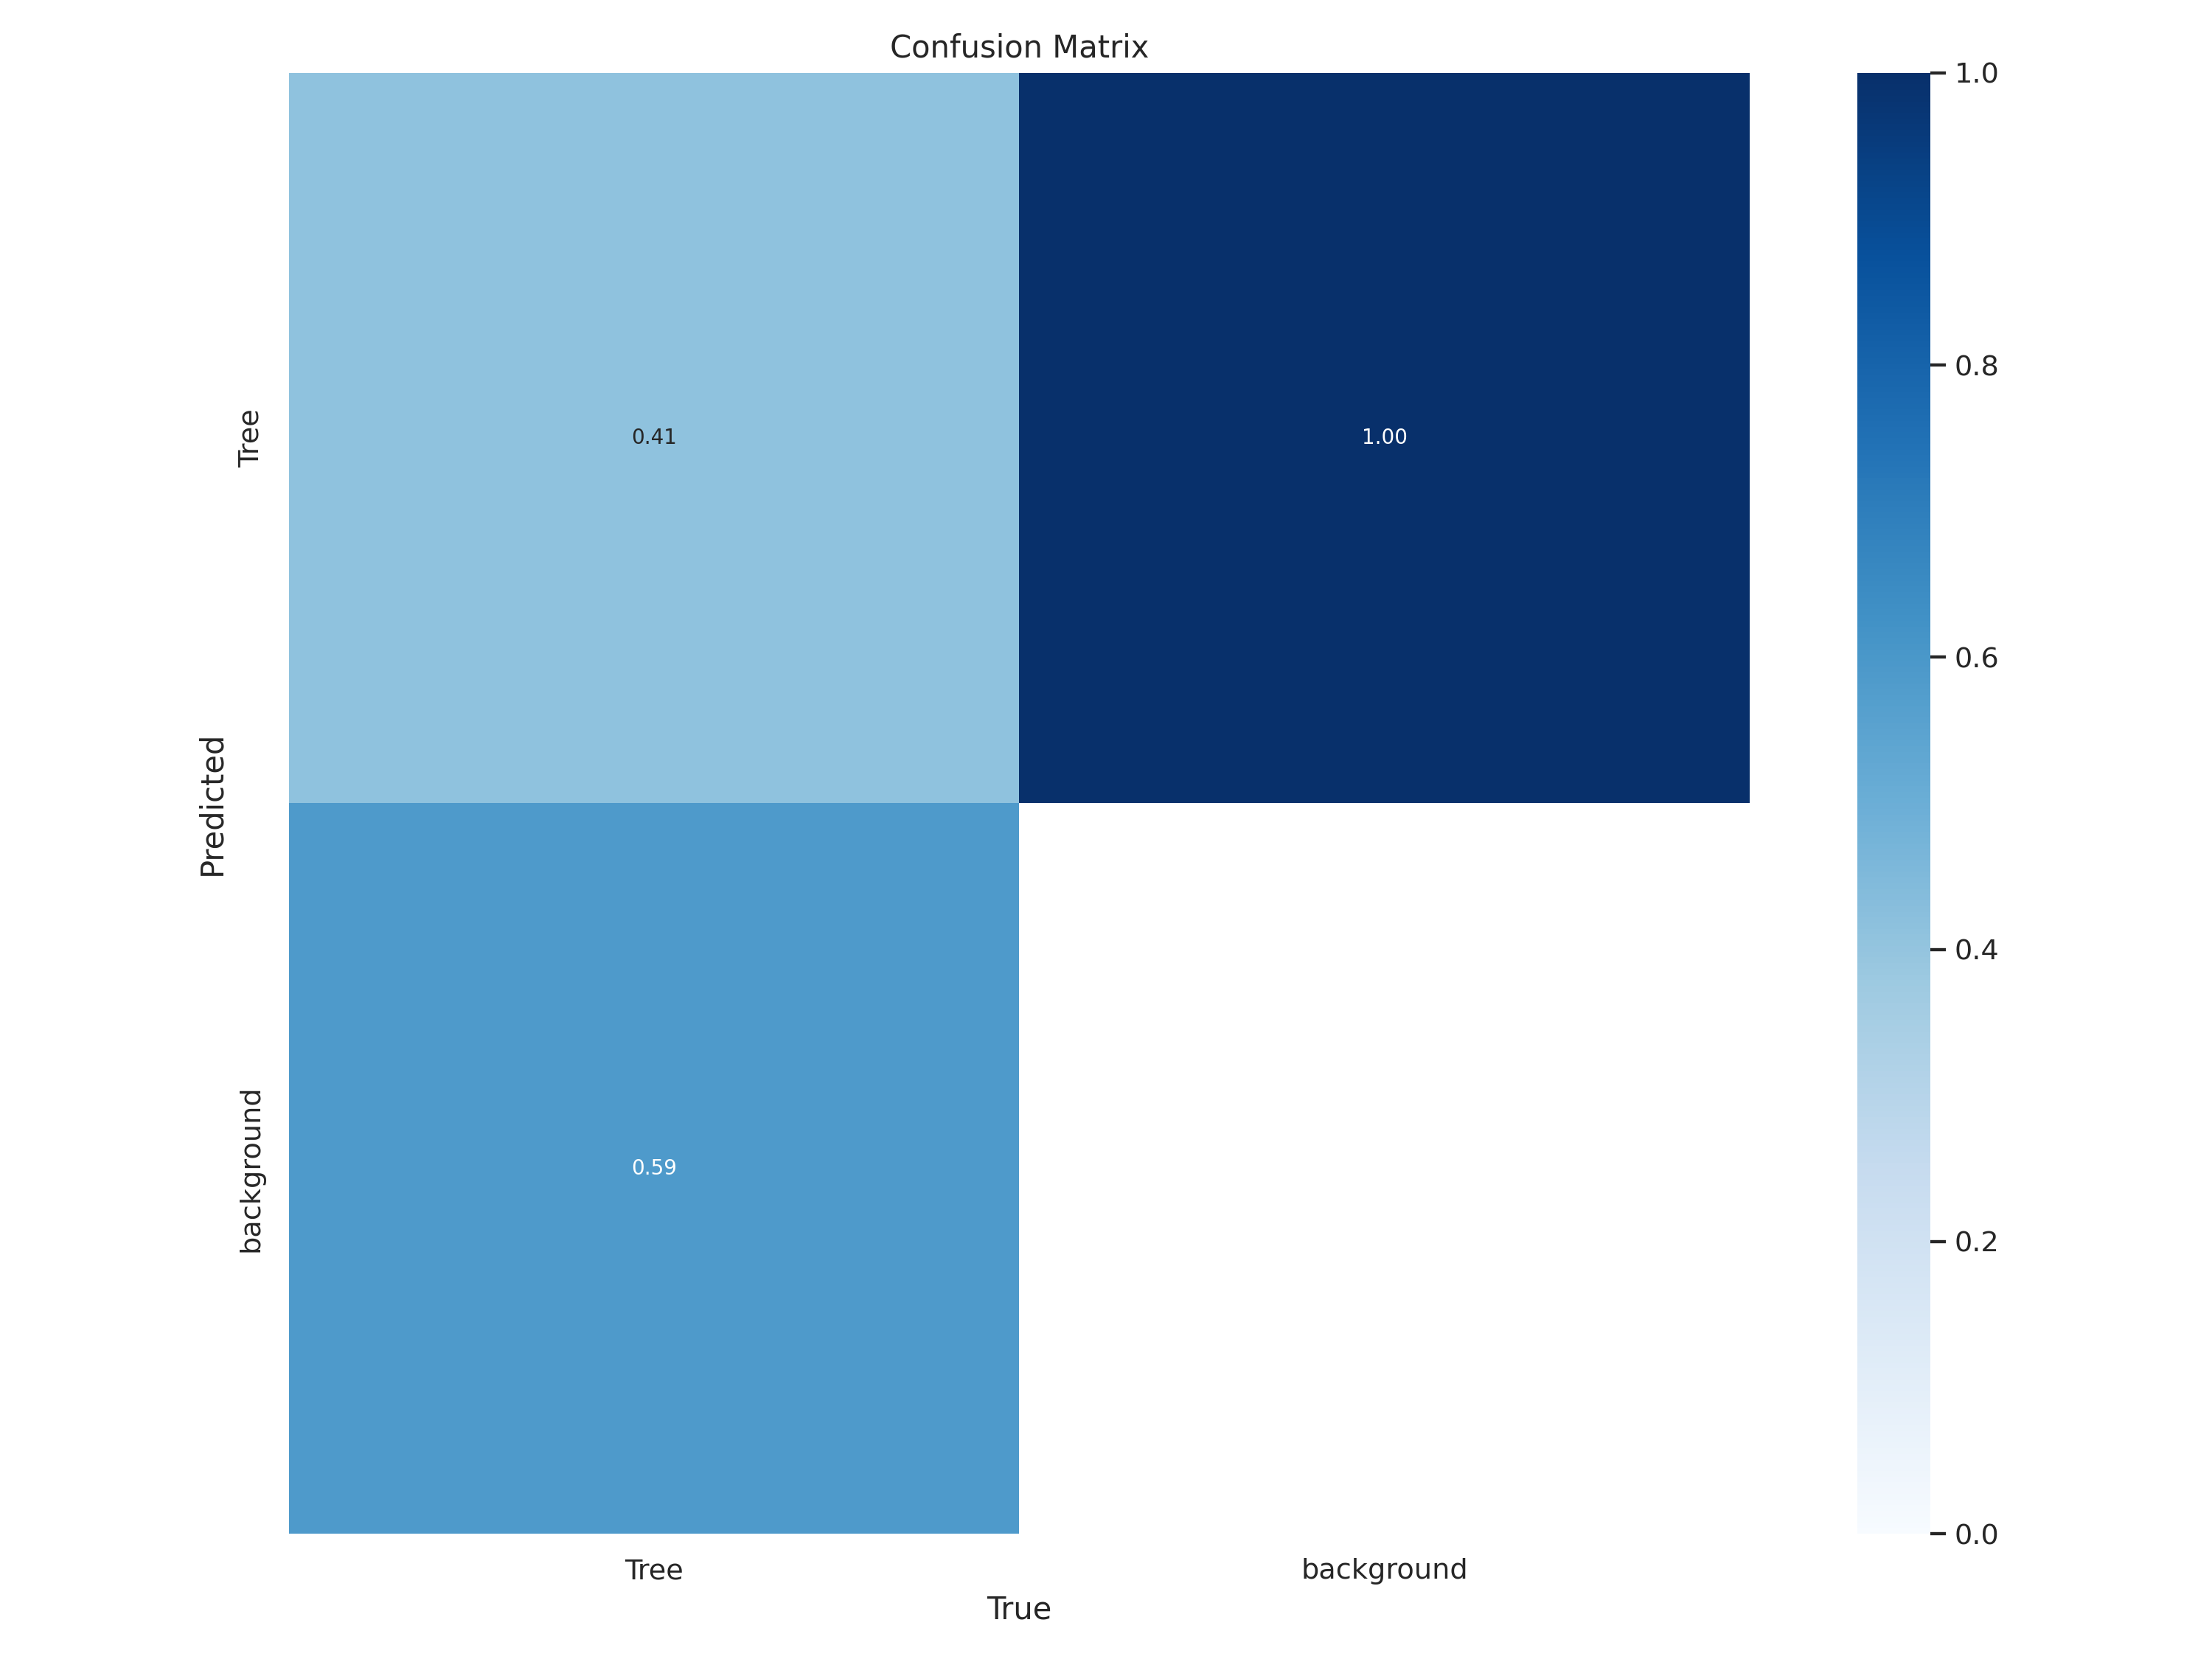

In [11]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train5/confusion_matrix.png', width=600)

/home/junior/Documents/stage-4a-SEDOGBO/model/model1/yolov8


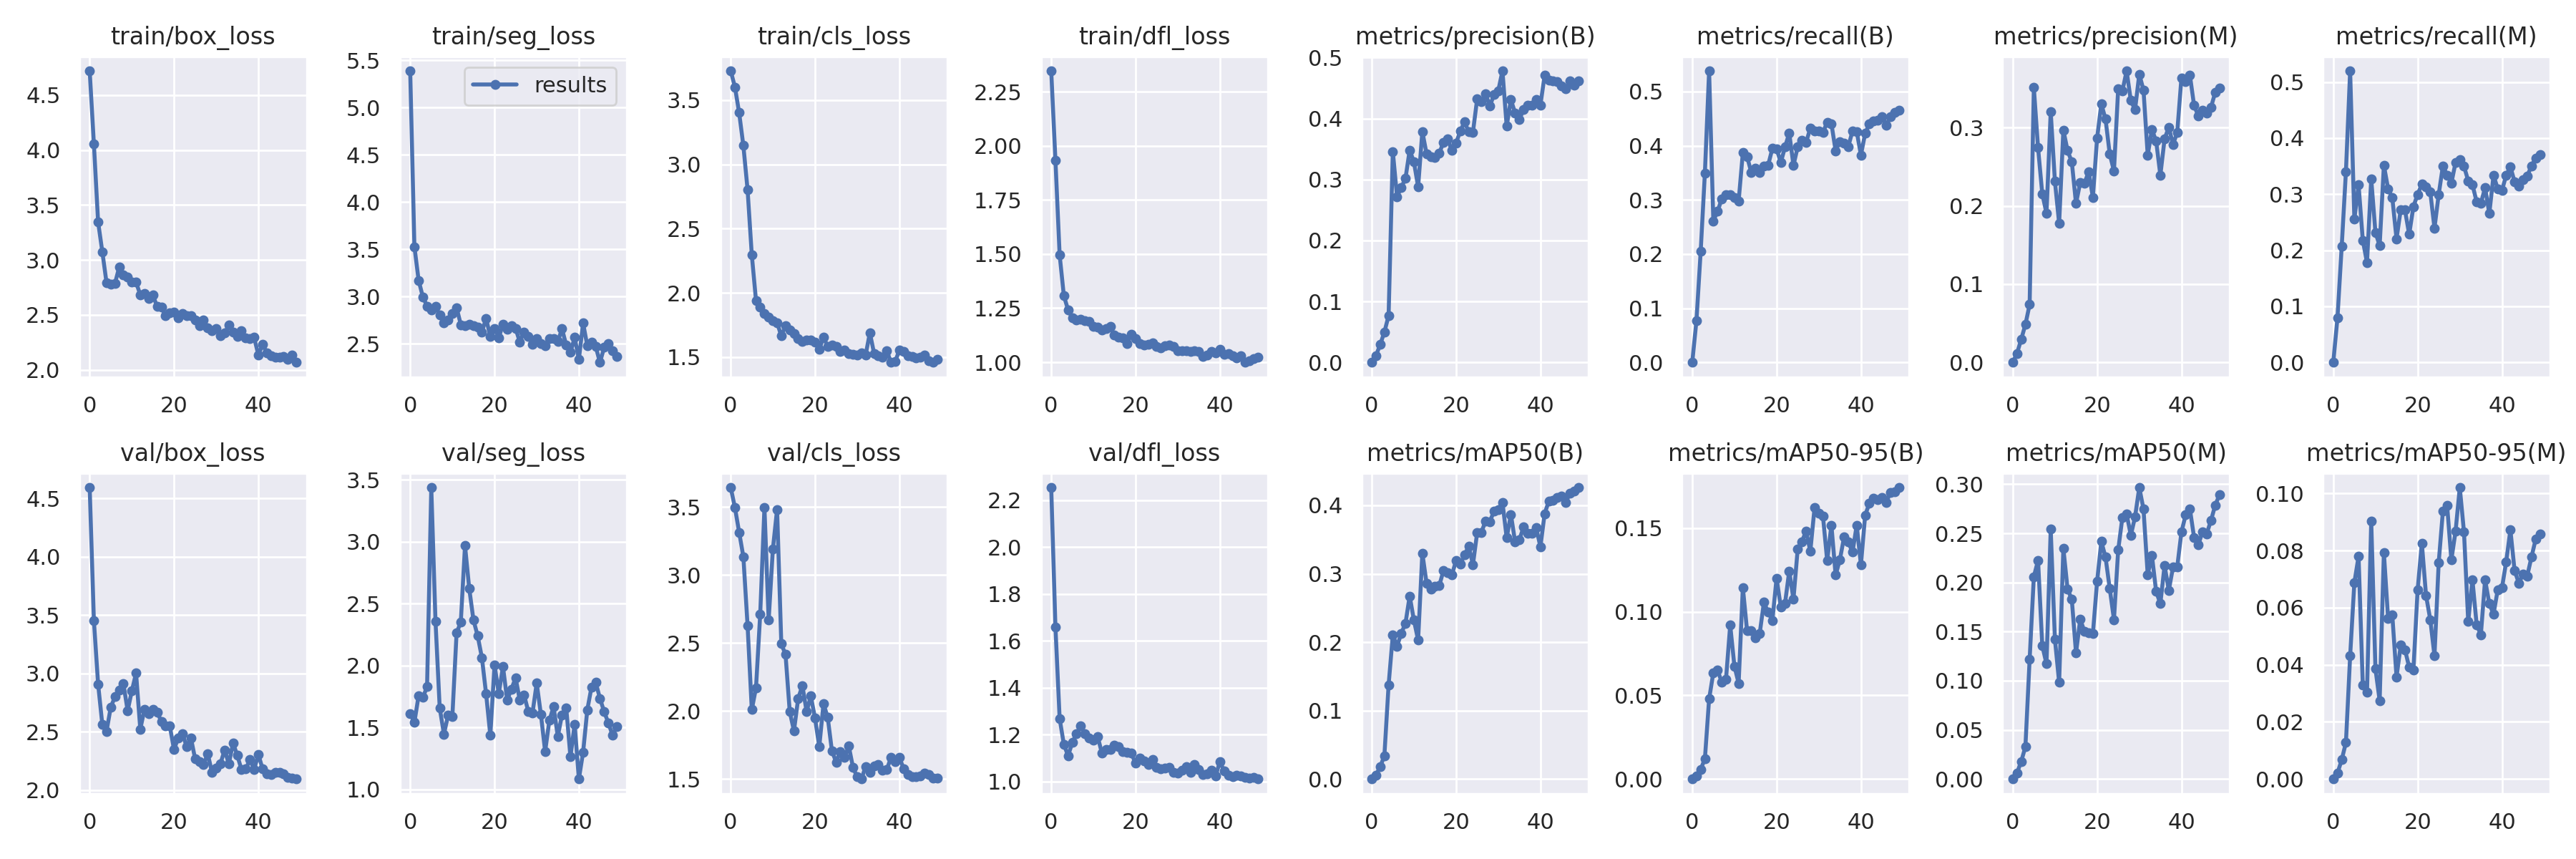

In [12]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train5/results.png', width=600)

/home/junior/Documents/stage-4a-SEDOGBO/model/model1/yolov8


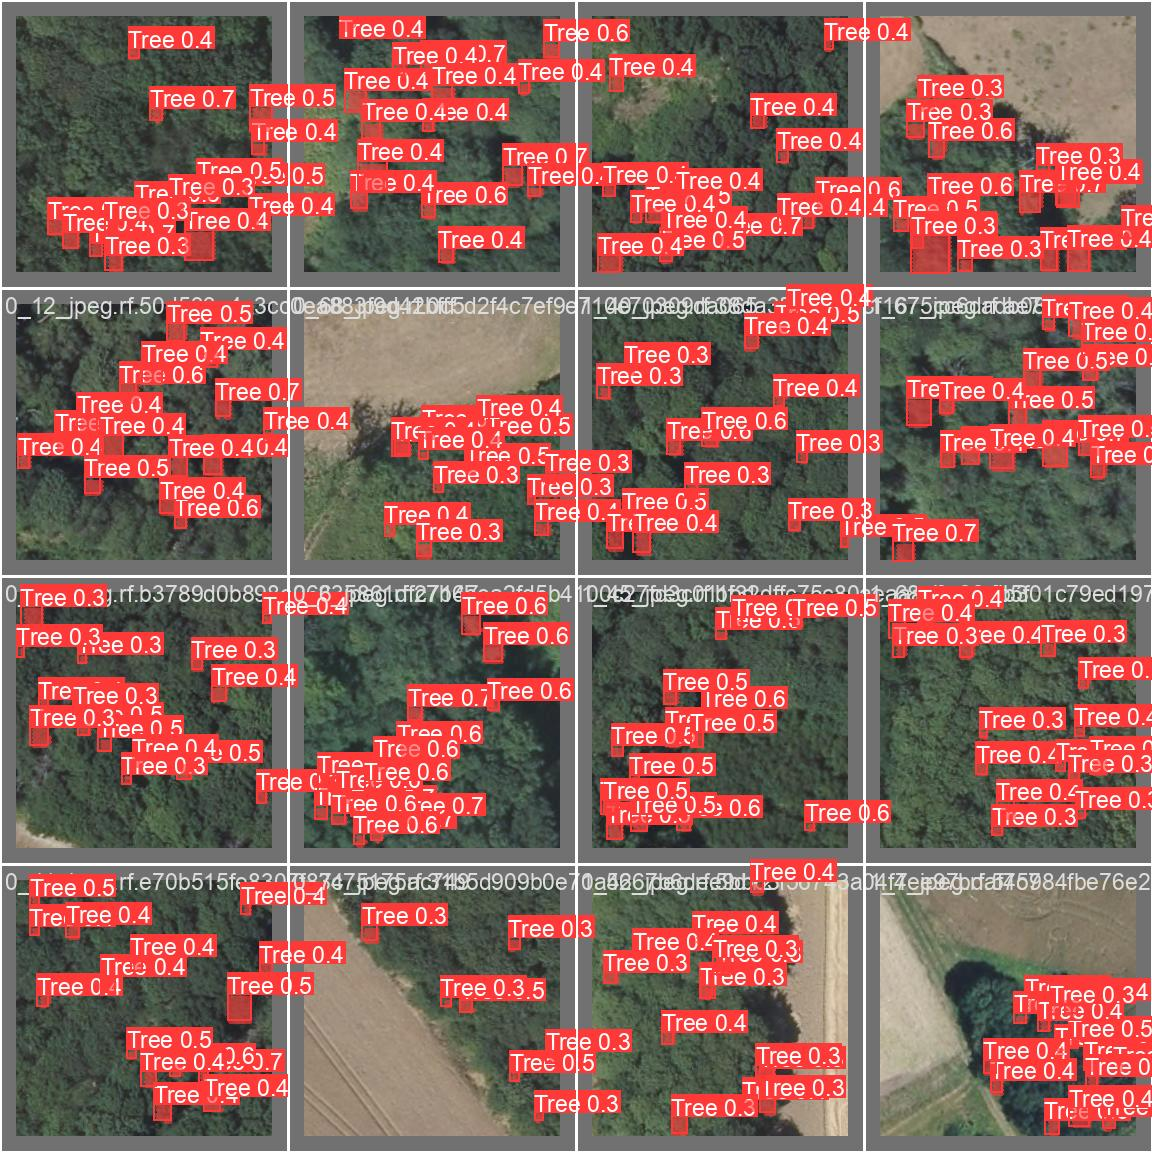

In [13]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train5/val_batch0_pred.jpg', width=600)